단변량분석 - Carseat 판매 회사

< 목표 : Carseat 판매 실적 하락 원인 조사 >

< 고객사의 상황 >
* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

< CarSeat의 시장 >


< 회사의 대표적인 매출 감소 원인 > 
1. 생산성 저하
2. 마케팅 실패
3. 품질보증 문제
4. 브랜드 가치 하락
5. 잘못된 물류 관리
6. 경기 침체 및 작은 시장 수요
7. 경쟁 업체의 부각 및 대체품 진입
8. 규제 요인 발생
9. 제품 수명주기 쇠퇴기 도입
10. 시간

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [5]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No
5,10.81,124,113,13,501,72,Bad,78,No,Yes
6,6.63,115,105,0,45,108,Medium,71,Yes,No
7,11.85,136,81,15,425,120,Good,67,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,No,No
9,4.69,132,113,0,131,124,Medium,76,No,Yes


### ① Sales (Target) 

In [6]:
var = 'Sales'

1) 변수의 비즈니스 의미

 - 각 지역 판매액(단위 1000$)

2) 숫자, 범주?

  - 숫자

3) NaN 존재 유무 및 조치방안

In [7]:
data[var].isna().sum()

# 데이터에 결측치가 존재하지 않아 조치 X

0

4) 가변수화 필요 여부

  - 숫자형 데이터로써 불必 

5) 기초통계량(수치화)

In [8]:
data[var].describe()

# 해당 데이터의 기초통계량을 분석한 결과
# 1. 최소 매출 0 / 최대 매출 16.27
# 2. 평균 매출 7.4


count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

Text(0.5, 0, 'Sales')

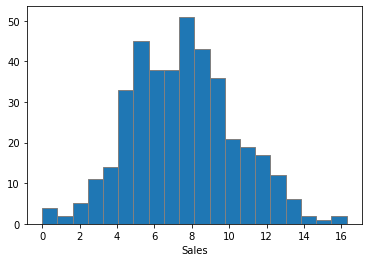

In [10]:
plt.hist(data[var], bins = 20, edgecolor = 'gray')
plt.xlabel("Sales")

### 7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

### 보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

**1. 매출이 아예 존재하지 않은 지역도 다수 존재한다. - 해당 지역 시장 공략 必**</br></br>
**2. 평균 매출액은 7400$이다.**</br></br>
**3. 최다 매출액은 16000$로써 10지역 정도 존재한다.**</br></br>

### 8) 추가 분석해 볼 사항이 있나요?


**1. 해당 데이터와 US 데이터를 조사하여, 당사 제품의 해외 시장 점유율에 대해 조사한다.**</br></br>
**2. 해당 데이터와 고객 Age 데이터를 조사하여, 해당 지역의 평균 연령대에 대해 조사한다.**</br>
  **- 판매량이 낮은 지역이 당사의 제품을 기피하는건지, 마케팅 대상이 아닌 연령대 인지 확인**</br></br>
**3. 해당 데이터와 지역 Income 데이터를 조사하여, 고소득 지역과 저소득 지역간의 판매량을 분석한다.**</br></br>
**4. 해당 데이터와 Advertising 데이터를 조사하여, 광고 지출액이 판매량에 도움이 되는지에 대해 조사한다.**</br></br>
**5. 해당 데이터와 지역 정보 데이터를 조사하여, 최다 매출액 지역과 최저 매출액 지역을 비교하며 조사한다.**</br></br>

### ② CompPrice

In [11]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

  - 경쟁 회사 제품 가격

2) 숫자, 범주?

  - 숫자

3) NaN 존재 유무 및 조치방안

In [12]:
data[var].isna().sum()

# 데이터에 결측치가 존재하지 않아 조치 X

0

4) 가변수화 필요 여부

- 숫자형 데이터로써 가변수화 불 필요

5) 기초통계량(수치화)

In [13]:
data[var].describe()

# 기초통계량 분석 결과
# 1. 최고가 : 175$ / 최저가 : 77$


count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

Text(0.5, 0, 'compPrice')

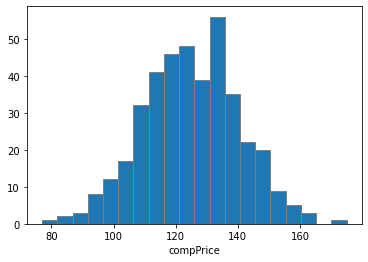

In [15]:
plt.hist(data[var], bins = 20, edgecolor='gray')
plt.xlabel("compPrice")

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

**1. 경쟁회사는 최저가 80$ / 최고가 175$의 가격으로 판매하고 있다.**</br></br>
**2. 경쟁회사 제품의 가격은 105 ~ 140$를 유지하고 있다.**</br></br>

8) 추가 분석해 볼 사항이 있나요?

**1. 경쟁회사가 판매하고 있는 지역을 조사해, 낮은 가격 / 높은 가격으로 판매하고 있는 지역의 정보(수입, 나이별 인구 등)에 대해 조사한다**</br></br>
**2, 지역 별 경쟁 회사와 당사의 제품 가격을 비교해 가격 경쟁력을 확인한다.**</br>
   **- 시장에서 타 제품과 보다 낮은 가격 경쟁으로 시장력을 확보한다.**</br></br>

### ③ Income

In [ ]:
var = 'Income'

1) 변수의 비즈니스 의미

해당 지역 평균 소득 ( 단위 1000$ )

2) 숫자, 범주?

  - 숫자

3) NaN 존재 유무 및 조치방안

In [16]:
data[var].isna().sum()

# 데이터에 결측치가 존재하지 않아 조치방안 X

0

4) 가변수화 필요 여부

  - 숫자형 데이터로써 가변수화 불필요

5) 기초통계량(수치화)

In [18]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

(array([ 1.,  2.,  3.,  8., 12., 17., 32., 41., 46., 48., 39., 56., 35.,
        22., 20.,  9.,  5.,  3.,  0.,  1.]),
 array([ 77. ,  81.9,  86.8,  91.7,  96.6, 101.5, 106.4, 111.3, 116.2,
        121.1, 126. , 130.9, 135.8, 140.7, 145.6, 150.5, 155.4, 160.3,
        165.2, 170.1, 175. ]),
 <BarContainer object of 20 artists>)

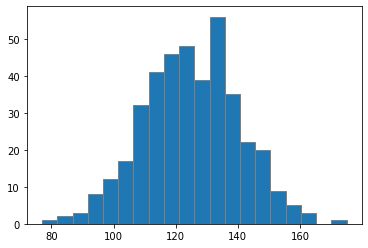

In [24]:
plt.hist(data[var], bins = 20, edgecolor = 'gray')

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

**1. 평균 지역 소득은 124000$ 이다.**</br></br>
   **- 나라 GOP가 124000$일 수 도있다.**</br></br>
**2. 평균 지역 소득이 80 ~ 90000$, 150000$ 이상인 지역은 그 외 지역 평균 소득과 차이가 심하다.**</br>
   **- 해당 지역들은 해외일 수도 있다.**</br></br>


8) 추가 분석해 볼 사항이 있나요?

**1. 해당 데이터와 Sales 데이터를 확인하여, 소득과 Carseat 판매량이 비례하는지 확인한다.**</br></br>
**2. 해당 데이터와 Age 데이터를 확인하여, 해당 지역이 노동하는 인구가 다소 포함 되어있는지 확인한다.**</br>
   **- 노동하는 인구는 대부분 젊은 인구이니, Carseat를 구매할 가능성이 높다.**</br></br>
**3. 해당 데이터와 Price 데이터를 확인하여, 당사 제품 가격과 지역 평균 소득이 비례한지 확인한다.**</br> 
   **- 평균 소득이 낮은 지역은 단가가 낮은 가성비 Carseat를 판매해 시장 경쟁력을 확보한다.**</br></br>

### ④ Advertising

In [25]:
var = 'Advertising'

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑤ Population

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑥ Price

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑦ ShelveLoc

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑧ Age

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑨ Urban

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑩ US

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?